In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_california_housing


In [ ]:
# creating the dataframe
data = fetch_california_housing()
df = pd.DataFrame(data.data)

In [ ]:
df.columns = data.feature_names

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [ ]:
df.shape[0]  #looking for rows

20640

In [ ]:
df.shape[1]   #len(df.columns)   #looking for columns

8

In [ ]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
df['TPRICE'] = data.target

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   TPRICE      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
TPRICE        float64
dtype: object

In [ ]:
df.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
TPRICE         3842
dtype: int64

In [ ]:
df.isnull()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TPRICE
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
TPRICE        0
dtype: int64

In [ ]:
df.isnull().sum().sum()   #sum of all null values

0

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TPRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TPRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


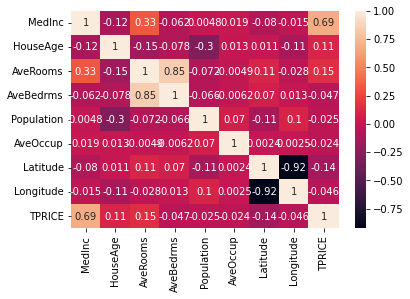

In [ ]:
# sns.pairplot(df)

sns.heatmap(df.corr(), annot=True)

In [ ]:
X= df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']]
Y = df['TPRICE']


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 101)

In [ ]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
9423,4.3125,21.0,11.380000,2.208000,599.0,2.396000,37.88,-122.71
2395,3.8750,23.0,50.837838,10.270270,64.0,1.729730,37.12,-119.34
19491,2.1487,44.0,4.944444,1.081597,1408.0,2.444444,37.65,-120.99
18101,5.1540,24.0,5.791453,1.082051,1627.0,2.781197,37.31,-122.04
18046,9.0704,36.0,7.252273,0.977273,1234.0,2.804545,37.23,-122.00
...,...,...,...,...,...,...,...,...
5695,4.6852,34.0,5.332599,1.046256,1232.0,2.713656,34.23,-118.25
8006,4.6429,36.0,6.089172,1.012739,416.0,2.649682,33.85,-118.10
17745,6.1463,6.0,7.181263,1.138493,1378.0,2.806517,37.30,-121.76
17931,3.2813,36.0,3.943128,1.000000,545.0,2.582938,37.35,-121.95


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
ln = LinearRegression()

In [ ]:
ln.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#intercept value   #cost function
ln.intercept_

-36.2132606477468

In [ ]:
ln.coef_

array([ 4.40303190e-01,  9.71905524e-03, -1.09966115e-01,  6.17870976e-01,
       -2.44045845e-06, -7.98718746e-03, -4.13268653e-01, -4.26268972e-01])

In [ ]:
coff_of = pd.DataFrame(ln.coef_, X.columns, columns = ["Coefficient"])

In [ ]:
coff_of

,Coefficient
MedInc,0.440303
HouseAge,0.009719
AveRooms,-0.109966
AveBedrms,0.617871
Population,-0.000002
AveOccup,-0.007987
Latitude,-0.413269
Longitude,-0.426269


In [ ]:
predictions = ln.predict(X_test)

In [ ]:
newdf = pd.DataFrame({'Actual value':Y_test, 'predicted value':predictions})

In [ ]:
newdf

,Actual value,predicted value
16086,4.06200,3.144124
8816,5.00001,5.501568
7175,1.22900,1.675111
16714,2.09100,2.583898
14491,5.00001,4.568459
...,...,...
5765,2.22400,1.620756
15372,1.71200,1.741389
10365,2.36200,2.013186
13402,1.16100,0.231385


Text(0.5, 1.0, 'actual vs predicted')

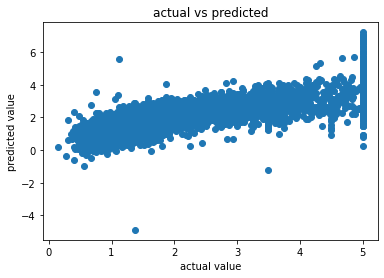

In [ ]:
plt.scatter(Y_test,predictions)
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.title('actual vs predicted')

In [ ]:
newdf.corr()

,Actual value,predicted value
Actual value,1.000000,0.765976
predicted value,0.765976,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


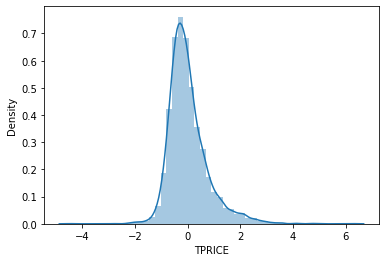

In [ ]:
sns.distplot((Y_test-predictions),bins =50);

In [ ]:
# c= ln.predict([a])


In [ ]:
# print(c)

PERFORMANCE OF MODEL

1 - perfect
0.9-0.79 strong
0.78-0.5 moderate
0.5-0.3 low
0.3-0 extreme low

In [ ]:
r2_score(Y_test,predictions)

0.5862235828098896